# Spaceship Titanic

### Installing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and understanding data

In [2]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


Let's see value count of categorical variables.

In [7]:
df_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
df_train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

We will check for any missing values.

In [10]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Let's check if there are any duplicated rows in the datasets.

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

## Exploratory Data Analysis

### Missing Data

Around 2 % of our data is missing in almost all the columns, but let's see how the nulls are located.

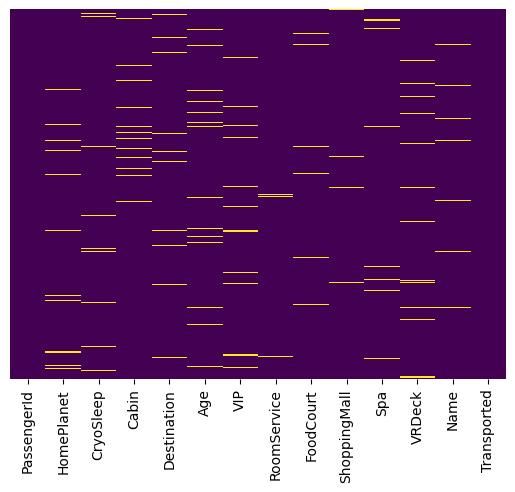

In [14]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Missing values are spread out around the whole dataset quite evenly. 
I realized we cannot drop them, because the test data as well has them, and if we drop them there, we will be missing some labels. Therefore, our score will go down. We'll have to impute with the most reasonable values.

Let's visualize more data. I will be analysing only the train dataset but making changes in both of them.

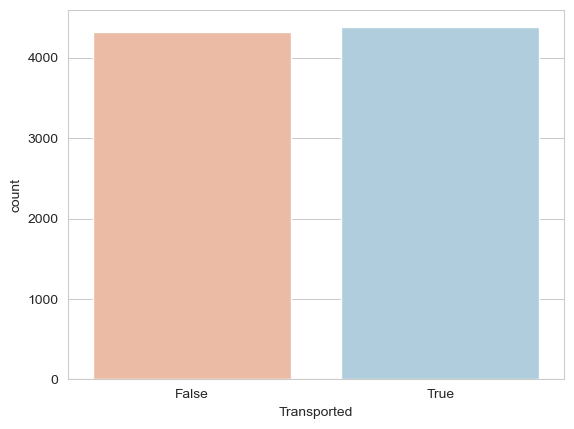

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', data=df_train, palette='RdBu');

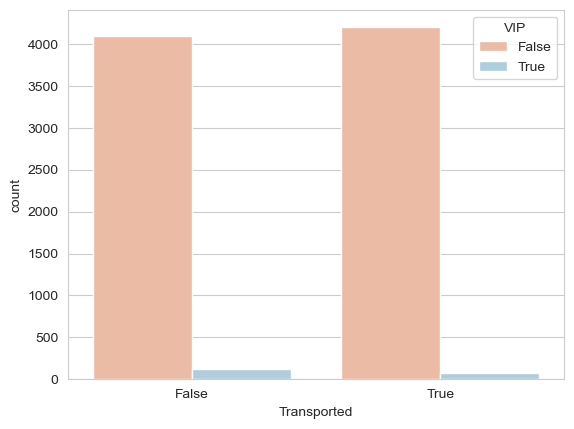

In [16]:
sns.countplot(x='Transported', hue='VIP', data=df_train, palette='RdBu');

Interestingly, looks like if you are VIP, you have less chance to be transported. Congrats ;)

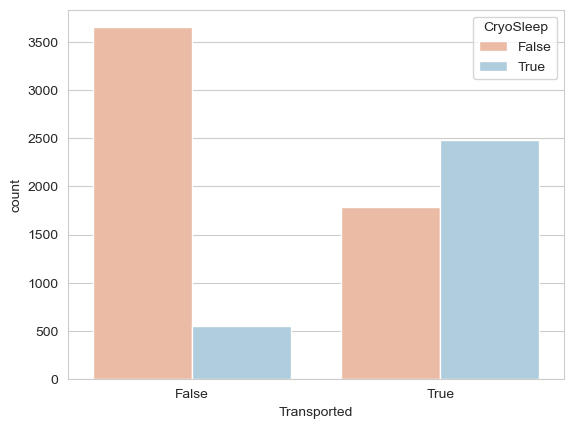

In [17]:
sns.countplot(x='Transported', hue='CryoSleep', data=df_train, palette='RdBu');

But being poor doesn't mean as much, as choosing CryoSleep.

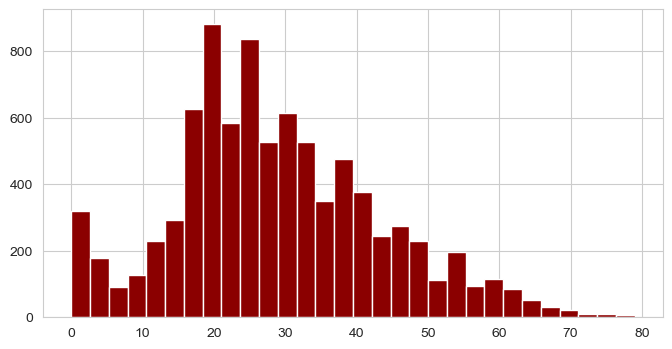

In [18]:
df_train.Age.hist(color='darkred', bins=30, figsize=(8,4));

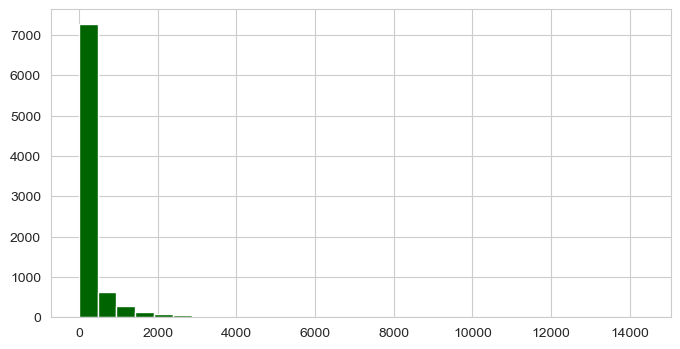

In [19]:
df_train.RoomService.hist(color='darkgreen', bins=30, figsize=(8,4));

## Data Cleaning

From the begining, I will drop `Name` column in both datasets and then create copy of data, just in case

In [20]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [21]:
# Create copies of the datasets, just in case
data_train = df_train.copy()
data_test =  df_test.copy()

Now, I will deal with a column `Cabin`. We should separate it into 3 columns: `deck`, `num` and `side`.

In [22]:
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)

In [23]:
# Drop original columns
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [25]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [41]:
df_train.Deck.value_counts(dropna=False)

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: Deck, dtype: int64

### Dealing with Nulls

For **categorical columns**, we can simply impute the most common value.

In [26]:
df_train.columns[df_train.dtypes != 'float64']

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Transported', 'Deck', 'Num', 'Side'],
      dtype='object')

In [27]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side'] 

In [28]:
# Most common values in each column
modes = df_train[categorical_columns].mode().iloc[0]
modes

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Deck                     F
Num                     82
Side                     S
Name: 0, dtype: object

In [29]:
df_test[categorical_columns].mode().iloc[0]

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Deck                     F
Num                      4
Side                     S
Name: 0, dtype: object

Test dataset has the same common values, as train data, except for `Num`.

In [42]:
df_train.Num.value_counts(dropna=False)

NaN     199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Num, Length: 1818, dtype: int64

`Num` column has a lot of unique value. I am not sure if we need it. Let's keep it for now. Later we will see.

Now, let's fill in missing values with the most common ones in all categorical columns.

In [43]:
df_train[categorical_columns] = df_train[categorical_columns].fillna(modes)
df_test[categorical_columns] = df_test[categorical_columns].fillna(modes)

Now let's deal with **numerical columns**. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average values for VIPs and non-VIPs.

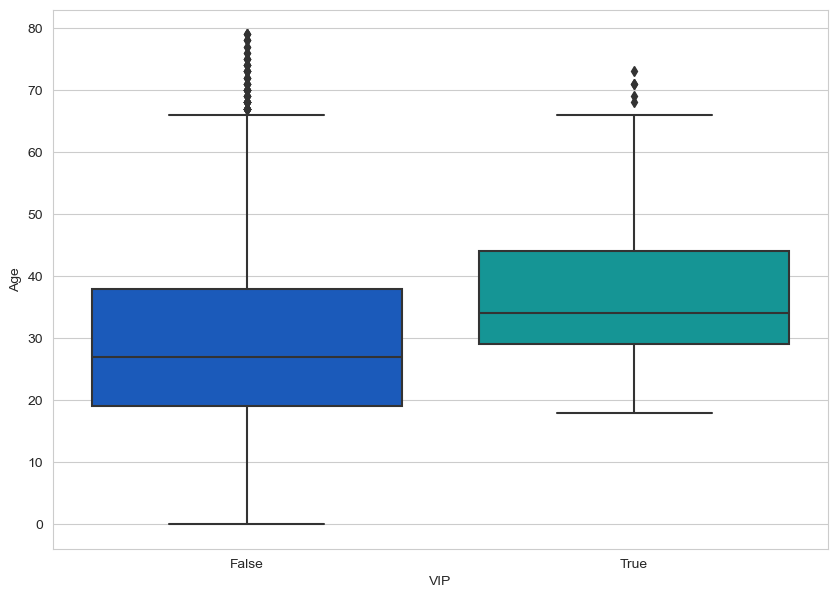

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x='VIP', y='Age', data=df_train, palette='winter');

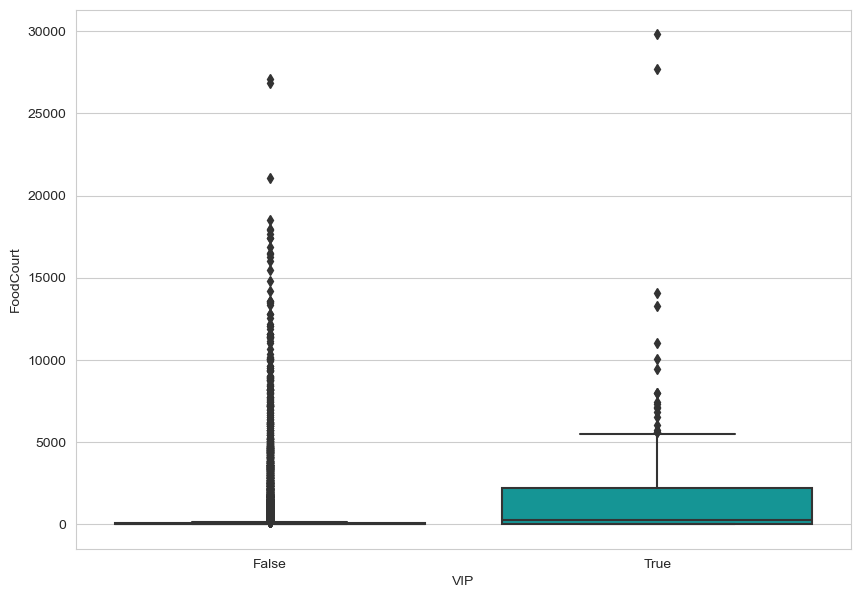

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x='VIP', y='FoodCourt', data=df_train, palette='winter');

There is definitely a correlation. Let's use it to impute missing values.

In [47]:
# Select numerical columns
numerical_cols = df_train.columns[df_train.dtypes == 'float64']
print(numerical_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [48]:
for df in [df_train, df_test]:

    for column in numerical_cols:

        # Calculate means based on VIP status
        mean_vip = df[df['VIP'] == True][column].mean()
        mean_non_vip = df[df['VIP'] == False][column].mean()

        # Impute missing values based on VIP status
        df.loc[(df['VIP'] == True) & (df[column].isnull()), column] = mean_vip
        df.loc[(df['VIP'] == False) & (df[column].isnull()), column] = mean_non_vip

Make sure we don't have any missing values anymore.

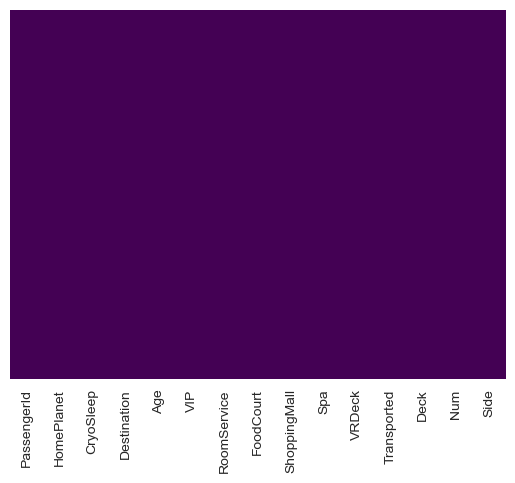

In [50]:
# Training data 
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

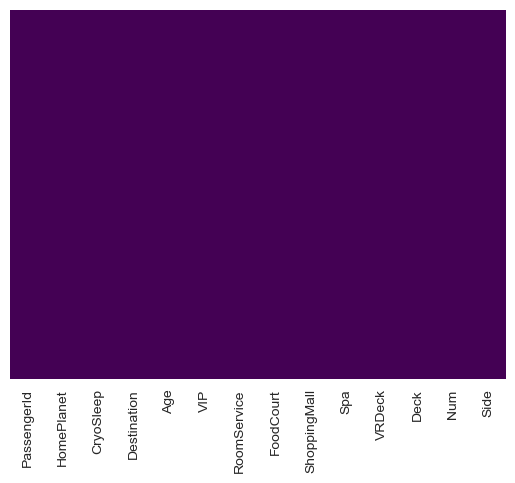

In [52]:
# Testing data
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Num           8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(6)
memory usage: 840.6+ KB


I am done! Have fun!